In [28]:
import matplotlib.pyplot as plt

# Import scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import numpy as np

In [9]:
!(python --version)

Python 3.10.12


In [41]:
lfw_people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# Instead of providing 2D data, X has data already in the form  of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Print Details about dataset
print("Number of Data Samples: % d" % n_samples)
print("Size of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Data Samples:  3023
Size of a data sample:  1850
Number of Class Labels:  62


In [10]:
print(h,w)

50 37


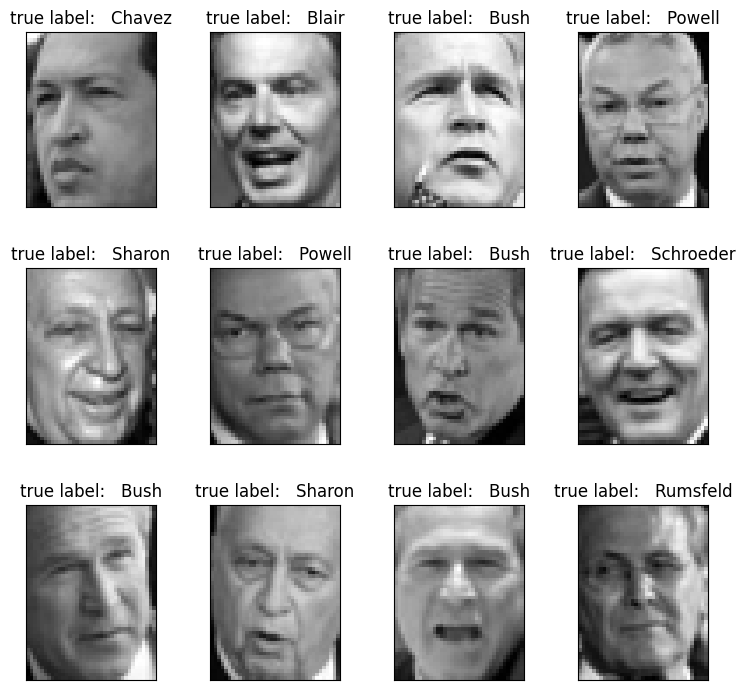

In [33]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)

true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)
print("size of training Data is % d and Testing Data is % d" %(
        y_train.shape[0], y_test.shape[0]))

size of training Data is  2267 and Testing Data is  756


In [6]:
from time import time

In [10]:
n_components = 150

t0 = time()
pca = PCA(n_components = n_components, svd_solver ='randomized',
          whiten = True).fit(X_train)
print("done in % 0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in % 0.3fs" % (time() - t0))

done in  0.320s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.042s


In [39]:
for n_components in range (10,50,10):
  t0 = time()
  pca = PCA(n_components = n_components, svd_solver ='randomized',
            whiten = True).fit(X_train)
  print("done in % 0.3fs" % (time() - t0))

  eigenfaces = pca.components_.reshape((n_components, h, w))
  print("n_components= %d" % n_components)
  print("Projecting the input data on the eigenfaces orthonormal basis")
  t0 = time()
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  print("done in % 0.3fs" % (time() - t0))
  print("Fitting the classifier to the training set")
  t0 = time()
  param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
  clf = GridSearchCV(
      SVC(kernel ='rbf', class_weight ='balanced'), param_grid
  )
  clf = clf.fit(X_train_pca, y_train)
  print("done in % 0.3fs" % (time() - t0))
  print("Best estimator found by grid search:")
  print(clf.best_estimator_)

  print("Predicting people's names on the test set")
  t0 = time()
  y_pred = clf.predict(X_test_pca)
  print("done in % 0.3fs" % (time() - t0))
  # print classifiction results
  print(classification_report(y_test, y_pred, target_names = target_names))
  # print confusion matrix
  print("Confusion Matrix is:")
  print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

done in  0.097s
n_components= 10
Projecting the input data on the eigenfaces orthonormal basis
done in  0.016s
Fitting the classifier to the training set
done in  117.614s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.1)
Predicting people's names on the test set
done in  0.015s
                   precision    recall  f1-score   support

     Ariel Sharon       0.14      0.23      0.18        13
     Colin Powell       0.41      0.45      0.43        60
  Donald Rumsfeld       0.22      0.30      0.25        27
    George W Bush       0.66      0.58      0.62       146
Gerhard Schroeder       0.10      0.12      0.11        25
      Hugo Chavez       0.20      0.20      0.20        15
       Tony Blair       0.57      0.44      0.50        36

         accuracy                           0.45       322
        macro avg       0.33      0.33      0.33       322
     weighted avg       0.48      0.45      0.46       322

Confusion Matrix is:
[[ 3  4  2

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
for n_components in range (10,50,10):
  print("n_components= %d" % n_components)
  t0 = time()
  pca = PCA(n_components = n_components, svd_solver ='randomized',
            whiten = True).fit(X_train)
  print("done in % 0.3fs" % (time() - t0))

  eigenfaces = pca.components_.reshape((n_components, h, w))

  print("Projecting the input data on the eigenfaces orthonormal basis")
  t0 = time()
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  print("done in % 0.3fs" % (time() - t0))
  print("Fitting the classifier to the training set")
  t0 = time()
  clf = LinearDiscriminantAnalysis()
  clf = clf.fit(X_train_pca, y_train)
  print("done in % 0.3fs" % (time() - t0))

  print("Predicting people's names on the test set")
  t0 = time()
  y_pred = clf.predict(X_test_pca)
  print("done in % 0.3fs" % (time() - t0))
  # print classifiction results
  print(classification_report(y_test, y_pred, target_names = target_names))
  # print confusion matrix
  print("Confusion Matrix is:")
  print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

n_components= 10
done in  0.189s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.029s
Fitting the classifier to the training set
done in  0.021s
Predicting people's names on the test set
done in  0.002s
                           precision    recall  f1-score   support

         Alejandro Toledo       0.20      0.08      0.12        12
             Alvaro Uribe       0.00      0.00      0.00         9
          Amelie Mauresmo       0.00      0.00      0.00        10
             Andre Agassi       0.00      0.00      0.00        10
           Angelina Jolie       0.00      0.00      0.00         6
             Ariel Sharon       0.00      0.00      0.00        18
    Arnold Schwarzenegger       0.00      0.00      0.00        18
     Atal Bihari Vajpayee       0.00      0.00      0.00         7
             Bill Clinton       0.00      0.00      0.00         6
             Carlos Menem       0.00      0.00      0.00         5
             Colin Powell       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


done in  0.244s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.022s
Fitting the classifier to the training set
done in  0.015s
Predicting people's names on the test set
done in  0.001s
                           precision    recall  f1-score   support

         Alejandro Toledo       0.29      0.17      0.21        12
             Alvaro Uribe       0.33      0.33      0.33         9
          Amelie Mauresmo       0.00      0.00      0.00        10
             Andre Agassi       0.40      0.20      0.27        10
           Angelina Jolie       0.67      0.33      0.44         6
             Ariel Sharon       0.00      0.00      0.00        18
    Arnold Schwarzenegger       0.00      0.00      0.00        18
     Atal Bihari Vajpayee       0.60      0.43      0.50         7
             Bill Clinton       0.50      0.33      0.40         6
             Carlos Menem       0.00      0.00      0.00         5
             Colin Powell       0.42      0.51     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


done in  0.224s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.030s
Fitting the classifier to the training set
done in  0.026s
Predicting people's names on the test set
done in  0.001s
                           precision    recall  f1-score   support

         Alejandro Toledo       0.29      0.17      0.21        12
             Alvaro Uribe       0.33      0.33      0.33         9
          Amelie Mauresmo       0.60      0.30      0.40        10
             Andre Agassi       0.25      0.10      0.14        10
           Angelina Jolie       0.67      0.33      0.44         6
             Ariel Sharon       0.33      0.28      0.30        18
    Arnold Schwarzenegger       0.14      0.06      0.08        18
     Atal Bihari Vajpayee       0.57      0.57      0.57         7
             Bill Clinton       0.67      0.33      0.44         6
             Carlos Menem       0.50      0.20      0.29         5
             Colin Powell       0.57      0.61     

In [14]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid
)
clf = clf.fit(X_train, y_train)
print("done in % 0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in % 0.3fs" % (time() - t0))
# print classifiction results
print(classification_report(y_test, y_pred, target_names = target_names))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

Fitting the classifier to the training set
done in  875.068s
Best estimator found by grid search:
SVC(C=50000.0, class_weight='balanced', gamma=0.0001)
Predicting people's names on the test set
done in  2.489s
                           precision    recall  f1-score   support

         Alejandro Toledo       0.43      0.50      0.46        12
             Alvaro Uribe       0.33      0.44      0.38         9
          Amelie Mauresmo       1.00      0.40      0.57        10
             Andre Agassi       0.14      0.20      0.17        10
           Angelina Jolie       0.50      0.33      0.40         6
             Ariel Sharon       0.53      0.56      0.54        18
    Arnold Schwarzenegger       0.50      0.39      0.44        18
     Atal Bihari Vajpayee       0.50      0.43      0.46         7
             Bill Clinton       0.43      0.50      0.46         6
             Carlos Menem       0.43      0.60      0.50         5
             Colin Powell       0.79      0.76      

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

for n_components in range (1,7):
  print("n_components= %d" % n_components)
  print("Fitting the classifier to the training set")
  t0 = time()
  clf = LinearDiscriminantAnalysis(n_components=n_components)
  clf = clf.fit(X_train, y_train)
  print("done in % 0.3fs" % (time() - t0))

  print("Predicting people's names on the test set")
  t0 = time()
  y_pred = clf.predict(X_test)
  print("done in % 0.3fs" % (time() - t0))
  # print classifiction results
  print(classification_report(y_test, y_pred, target_names = target_names))
  # print confusion matrix
  print("Confusion Matrix is:")
  print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

n_components= 1
Fitting the classifier to the training set
done in  1.612s
Predicting people's names on the test set
done in  0.004s
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.62      0.55        13
     Colin Powell       0.69      0.70      0.69        60
  Donald Rumsfeld       0.54      0.52      0.53        27
    George W Bush       0.86      0.76      0.81       146
Gerhard Schroeder       0.55      0.68      0.61        25
      Hugo Chavez       0.56      0.60      0.58        15
       Tony Blair       0.56      0.67      0.61        36

         accuracy                           0.70       322
        macro avg       0.61      0.65      0.63       322
     weighted avg       0.71      0.70      0.70       322

Confusion Matrix is:
[[  8   2   2   0   1   0   0]
 [  2  42   1   6   2   4   3]
 [  2   2  14   4   0   1   4]
 [  3  11   6 111   4   2   9]
 [  0   1   1   3  17   0   3]
 [  0   0   1   3   2   9   0]
 [  1   